<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  Iris Classification & Deployment for begginers </h1>
</div>


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    TABLE OF CONTENTS
</div>  


<div style="background-color: #ffa500; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">
        1. LIBRARY IMPORTS<br>
        2. LOAD DATA<br>
        3. Handling missing and duplicated data<br>
        4. Statistical Summary<br>
        5. EDA & Data visualization<br>
        6. Encoding<br>
        7. Feature Scaling<br>
        8. Splitting data<br>
        9. Training and evaluation of model<br>
        10. Model comparison<br>
        11. Conclusion
    </h1>
</div>
   

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LIBRARY IMPORTS
</div>


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LOAD DATA
</div>

In [2]:
df = pd.read_csv(r"/kaggle/input/iris-flower-dataset/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Handling missing Duplicated data
</div>

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<!-- # Fill missing processor_type with 'unknown' -->

# Drop the duplicated data

In [5]:
df.duplicated().sum()

3

In [6]:
df.shape

(150, 5)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Statastical Summary
</div>

In [7]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal_width,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
petal_length,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
petal_width,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    EDA & Data visualization
</div>

## Pairwise correlation heatmap

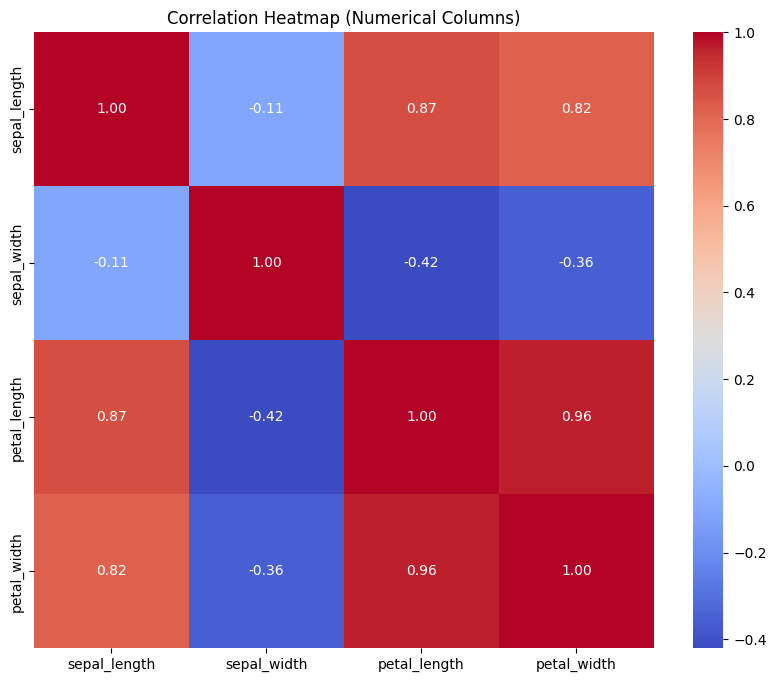

In [8]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

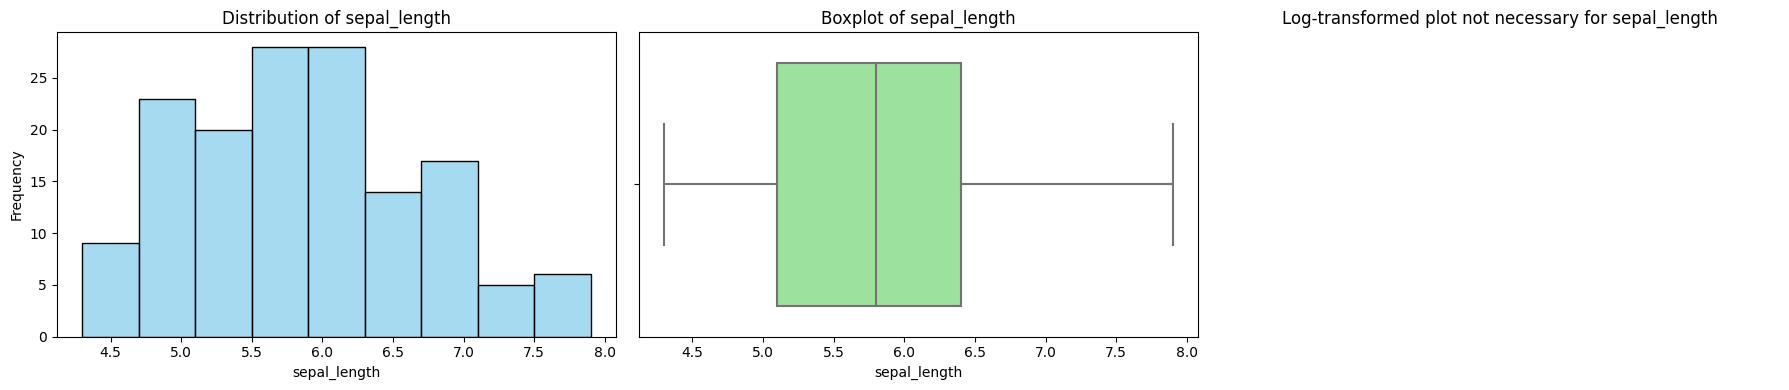

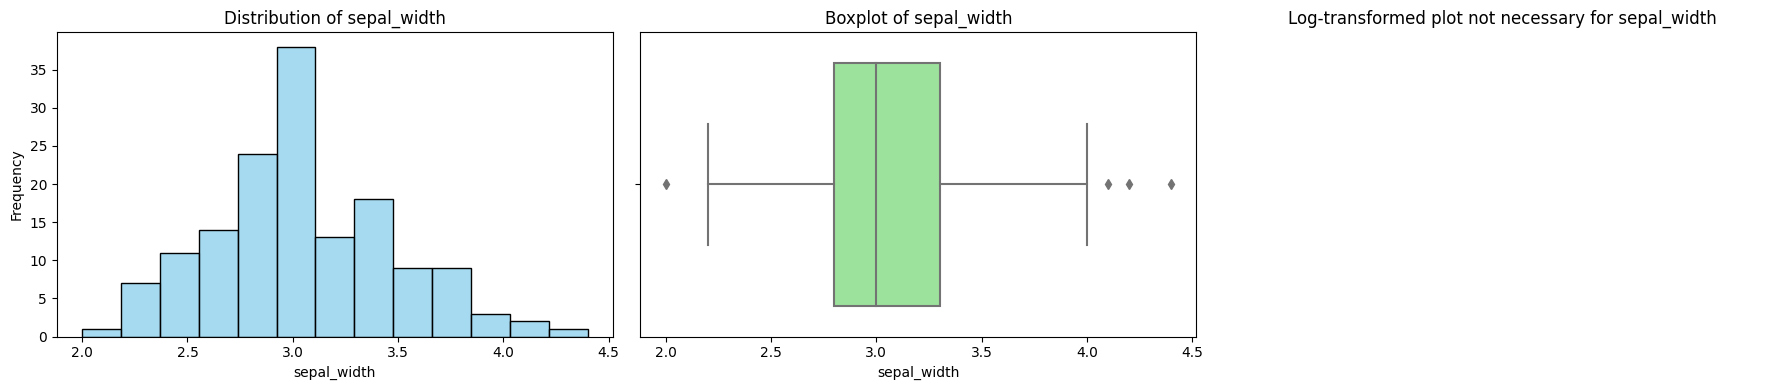

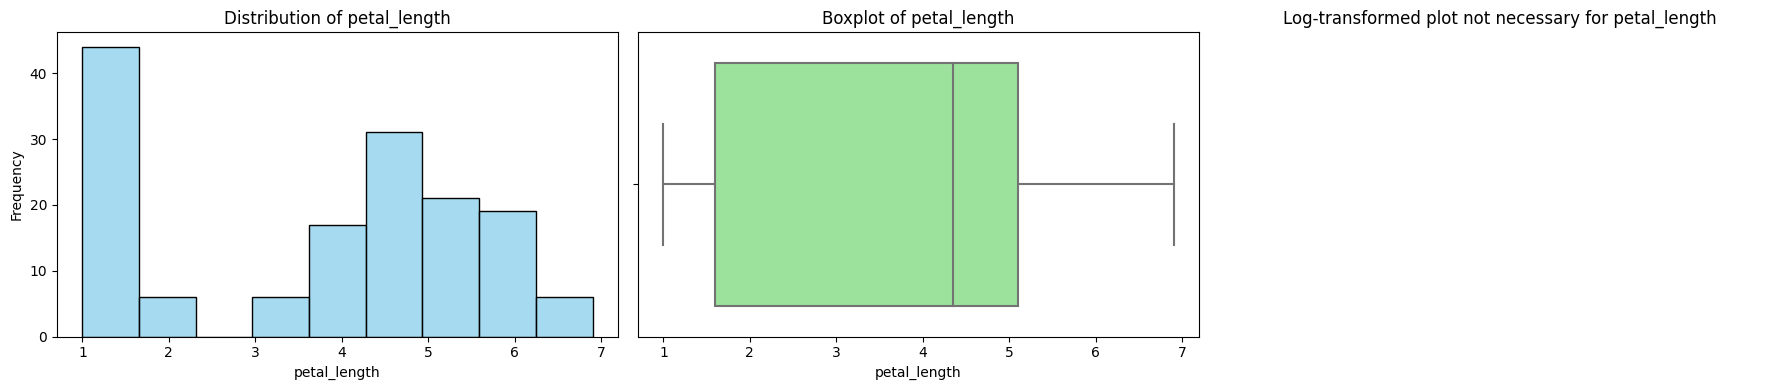

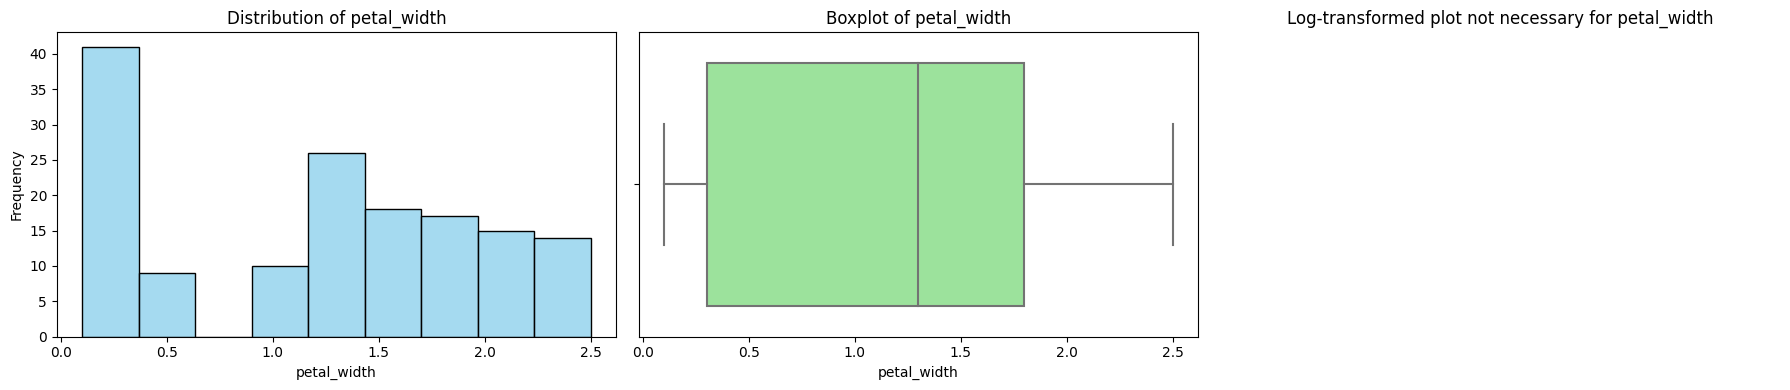

In [9]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=df[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if df[column].skew() > 1:
        df[column+'_log'] = np.log1p(df[column])
        sns.histplot(df[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

## scatter and pair plots

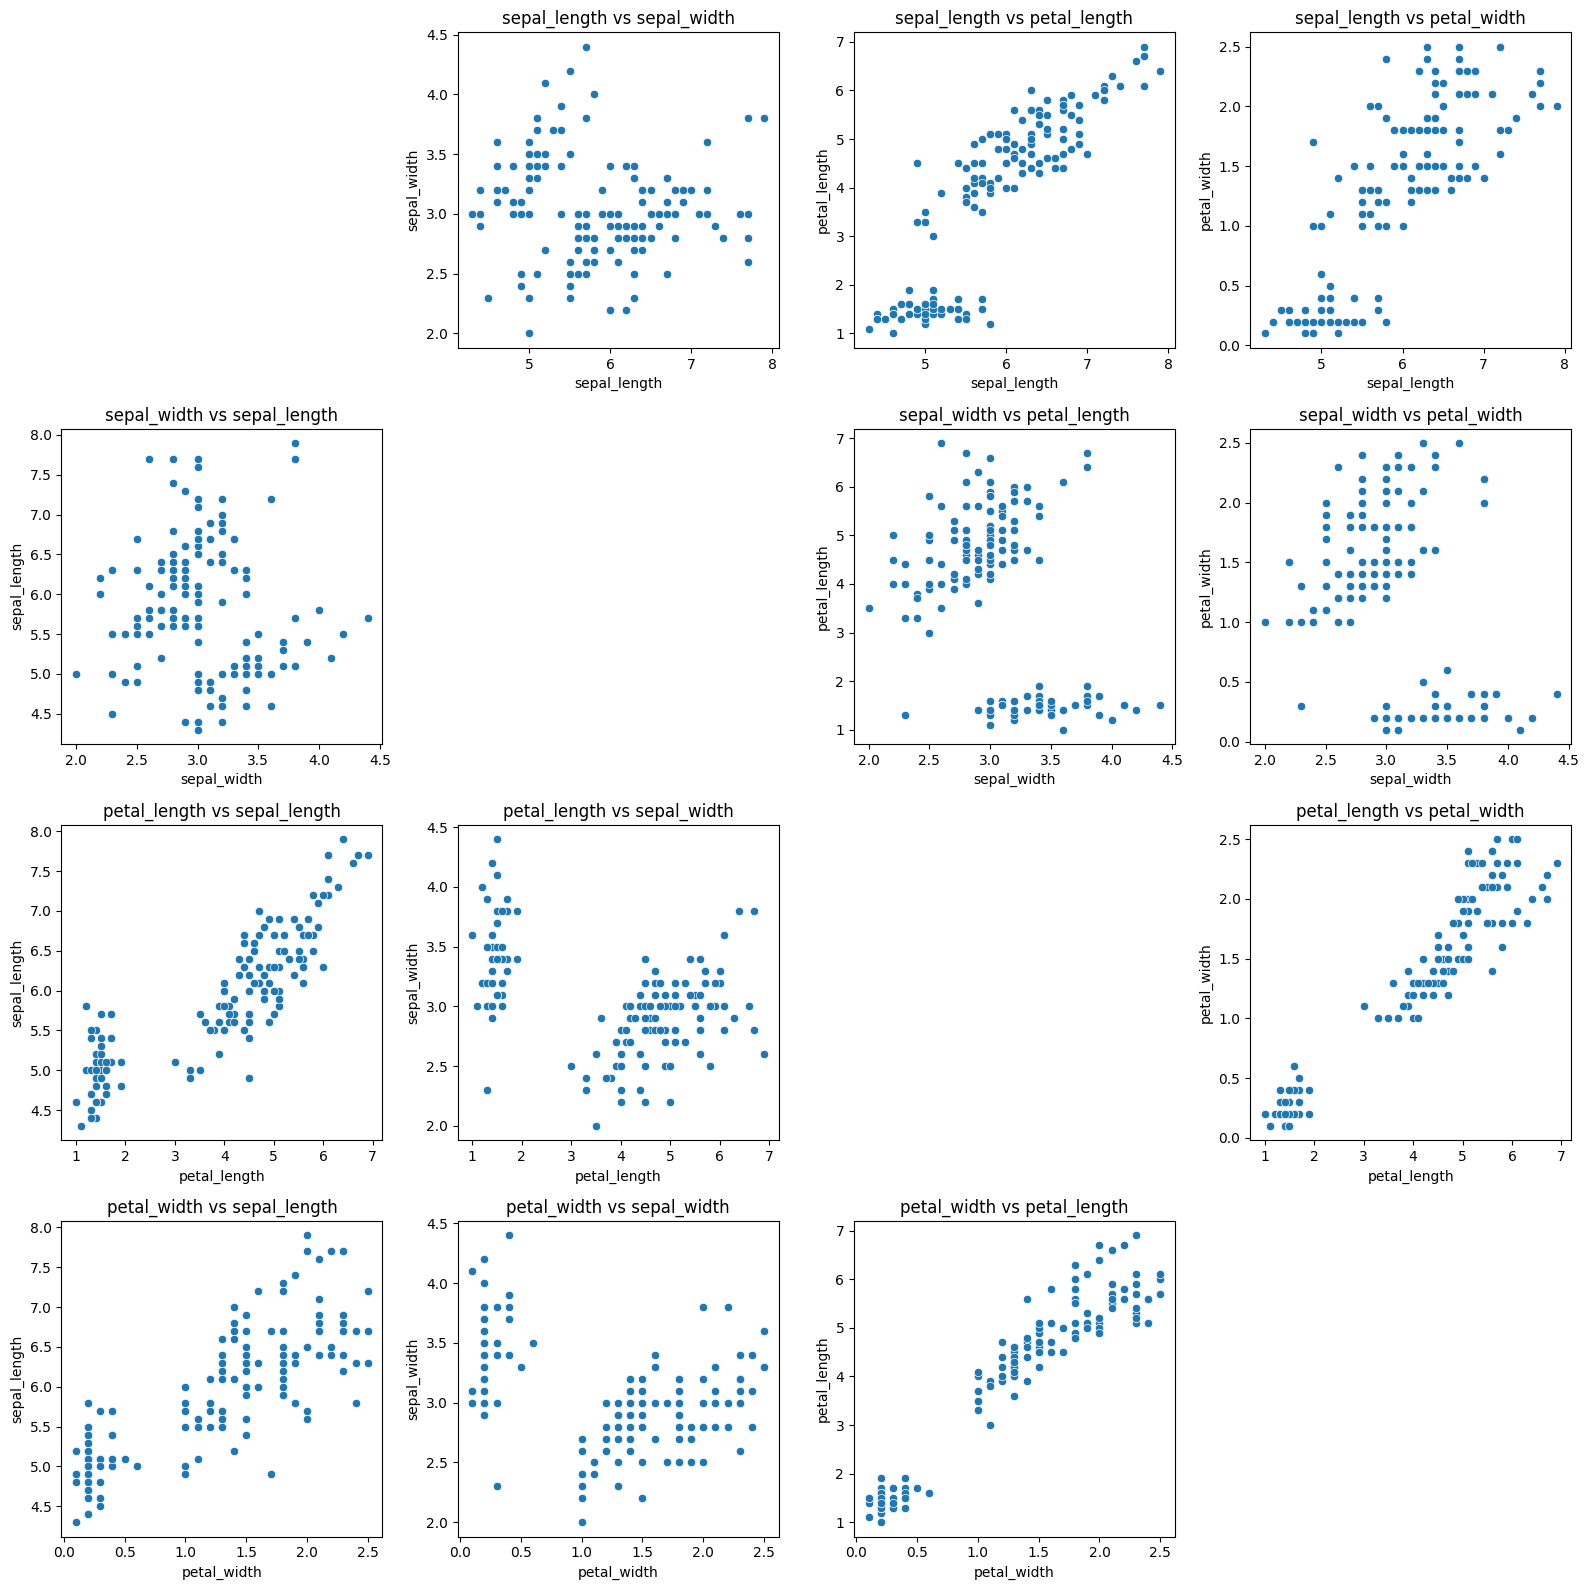

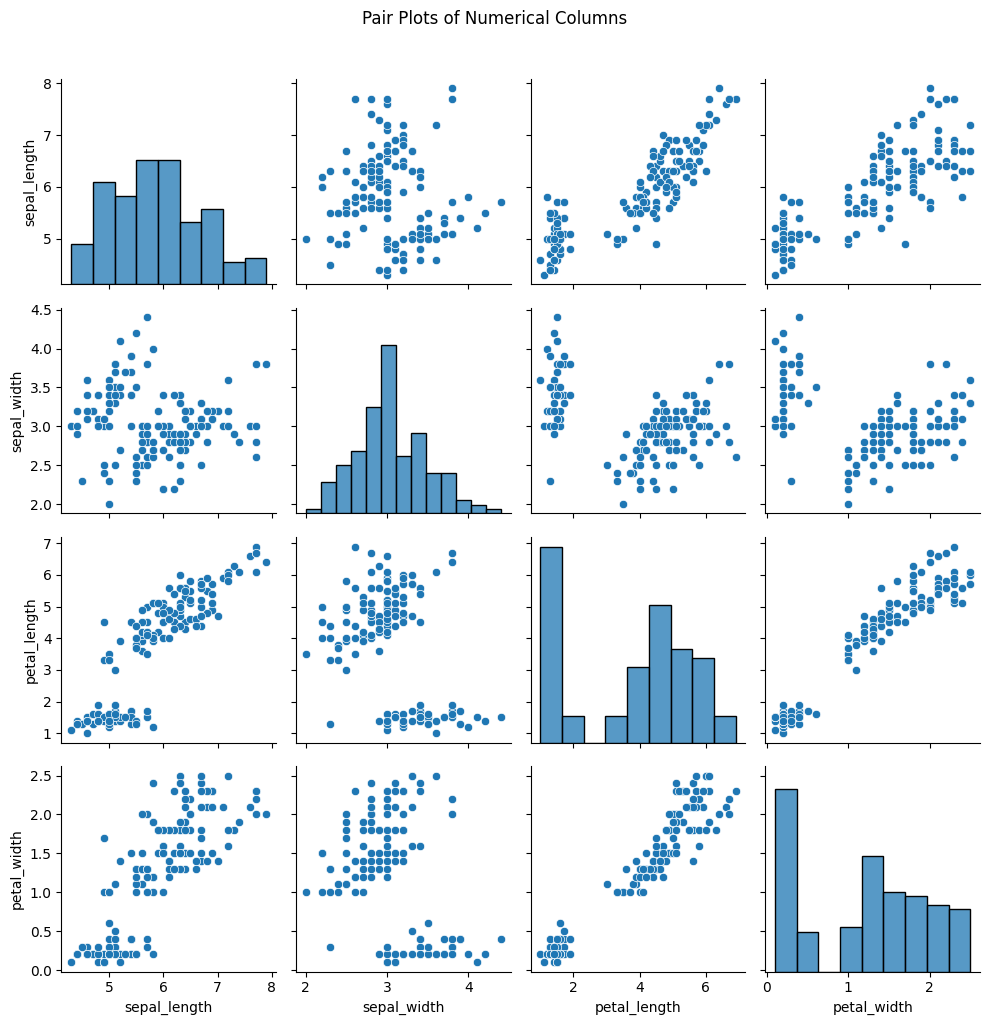

In [10]:
def scatter_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=df[numerical_columns[i]], y=df[numerical_columns[j]])
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
def pair_plots(df, numerical_columns):
    pair_plot = sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.show()
scatter_plots(df, numerical_columns)
pair_plots(df, numerical_columns)


## Handling Outliers

<Axes: >

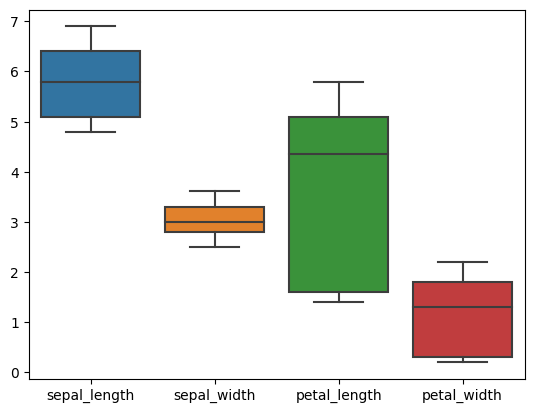

In [11]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].clip(df[numeric_columns].quantile(0.1), df[numeric_columns].quantile(0.9), axis=1)
sns.boxplot(df)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Encoding
</div>

In [12]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [13]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'species':
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']



# Label encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df[column])
df1 = df

In [15]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.8,3.2,1.4,0.2,0
3,4.8,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.2,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.2,2


In [16]:
df1.shape

(150, 5)

In [17]:
y=df1['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [18]:
X = df1.drop(['species'],axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.8,3.2,1.4,0.2
3,4.8,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.2
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.2


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Feature Scaling
</div>

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X

array([[-1.01198043,  1.32070464, -1.38397688, -1.34837712],
       [-1.29439357, -0.12216277, -1.38397688, -1.34837712],
       [-1.43560015,  0.45498419, -1.38397688, -1.34837712],
       [-1.43560015,  0.16641071, -1.32454472, -1.34837712],
       [-1.153187  ,  1.60927813, -1.38397688, -1.34837712],
       [-0.58836072,  1.63813548, -1.2056804 , -1.07524198],
       [-1.43560015,  1.03213116, -1.38397688, -1.21180955],
       [-1.153187  ,  1.03213116, -1.32454472, -1.34837712],
       [-1.43560015, -0.41073626, -1.38397688, -1.34837712],
       [-1.29439357,  0.16641071, -1.32454472, -1.34837712],
       [-0.58836072,  1.63813548, -1.32454472, -1.34837712],
       [-1.43560015,  1.03213116, -1.26511256, -1.34837712],
       [-1.43560015, -0.12216277, -1.38397688, -1.34837712],
       [-1.43560015, -0.12216277, -1.38397688, -1.34837712],
       [-0.02353443,  1.63813548, -1.38397688, -1.34837712],
       [-0.164741  ,  1.63813548, -1.32454472, -1.07524198],
       [-0.58836072,  1.

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Splitting data
</div>

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train

array([[-1.43560015,  1.60927813, -1.38397688, -1.34837712],
       [-0.164741  ,  1.63813548, -1.32454472, -1.07524198],
       [ 1.24732472,  0.16641071,  0.3989879 ,  0.29043369],
       [-1.43560015,  1.03213116, -1.26511256, -1.34837712],
       [-1.43560015,  0.45498419, -1.38397688, -1.34837712],
       [ 0.68249843, -1.56503019,  0.75558085,  0.97327153],
       [ 0.823705  ,  0.45498419,  0.45842005,  0.42700126],
       [-0.87077386,  1.32070464, -1.32454472, -1.34837712],
       [-1.153187  ,  1.60927813, -1.38397688, -1.34837712],
       [-0.87077386,  1.63813548, -1.32454472, -1.34837712],
       [-0.02353443, -0.98788323,  0.81501301,  0.97327153],
       [ 0.25887871,  1.03213116,  0.45842005,  0.56356883],
       [ 1.24732472,  0.16641071,  0.57728437,  0.42700126],
       [-0.58836072,  1.63813548, -1.38397688, -1.07524198],
       [-0.58836072,  1.63813548, -1.32454472, -1.34837712],
       [-0.44715414, -1.56503019, -0.01703722, -0.25583658],
       [ 0.68249843, -0.

In [23]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 120, dtype: int64

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Training and evalution of model
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

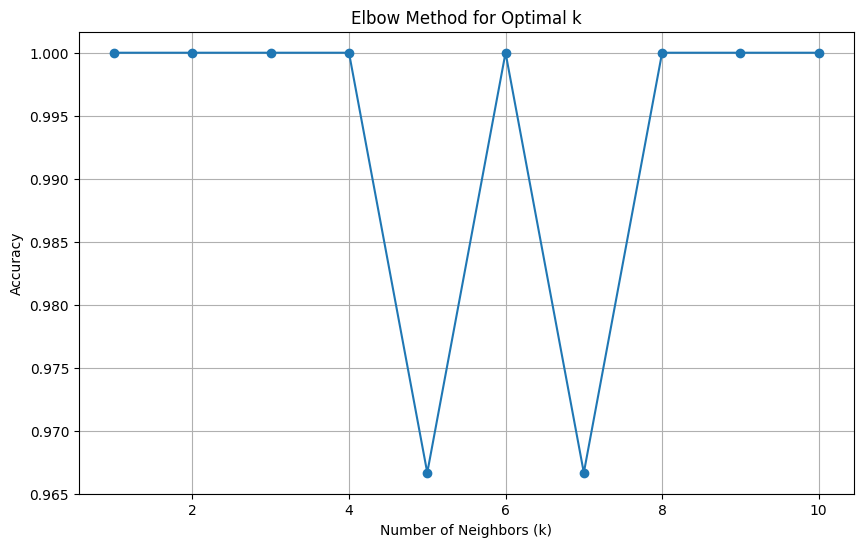

In [24]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), accuracy_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



In [25]:
# Train the KNN model with the optimal k
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [26]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)



In [27]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 0.975
Training Precision: 0.9752083333333332
Training Recall: 0.975
Training F1 Score: 0.975003906860447
Training Confusion Matrix:
[[40  0  0]
 [ 0 39  2]
 [ 0  1 38]]

Testing Accuracy: 1.0
Testing Precision: 1.0
Testing Recall: 1.0
Testing F1 Score: 1.0
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> DecisionTree </h1>
</div>

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_estimator_



Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [29]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeClassifier(**best_params)
best_dt_regressor.fit(X_train, y_train)




Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

In [30]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)



In [31]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 0.95
Training Precision: 0.9527513227513228
Training Recall: 0.95
Training F1 Score: 0.9498114393463231
Training Confusion Matrix:
[[40  0  0]
 [ 0 40  1]
 [ 0  5 34]]

Testing Accuracy: 1.0
Testing Precision: 1.0
Testing Recall: 1.0
Testing F1 Score: 1.0
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> RandomForest </h1>
</div>

In [32]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_classifier = grid_search.best_estimator_




Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [33]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_regressor = RandomForestClassifier(**best_params)
best_rf_regressor.fit(X_train, y_train)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

In [34]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 0.95
Training Precision: 0.9527513227513228
Training Recall: 0.95
Training F1 Score: 0.9498114393463231
Training Confusion Matrix:
[[40  0  0]
 [ 0 40  1]
 [ 0  5 34]]

Testing Accuracy: 1.0
Testing Precision: 1.0
Testing Recall: 1.0
Testing F1 Score: 1.0
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [35]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 0.95
Training Precision: 0.9527513227513228
Training Recall: 0.95
Training F1 Score: 0.9498114393463231
Training Confusion Matrix:
[[40  0  0]
 [ 0 40  1]
 [ 0  5 34]]

Testing Accuracy: 1.0
Testing Precision: 1.0
Testing Recall: 1.0
Testing F1 Score: 1.0
Testing Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Model comparison
</div>

In [36]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    })
results_df = pd.DataFrame(results)
results_df


,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Random Forest,1.00,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,1.00,1.000000,1.000000,1.000000,1.000000
2,K-Nearest Neighbors,0.95,0.966667,0.969444,0.966667,0.966411


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Conclusion
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Performance of all models are same.</h1>
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> Deployment </h1>
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Save a trained k-nearest neighbors (KNN) model and a scaler using the pickle module. </h1>
</div>

In [37]:
'''
import pickle
pickle.dump(knn, open('model.pkl', 'wb'))
pickle.dump(scaler, open('stand.pkl', 'wb'))
'''
        

"\nimport pickle\npickle.dump(knn, open('model.pkl', 'wb'))\npickle.dump(scaler, open('stand.pkl', 'wb'))\n"

<div style="background-color: #66bbf1; padding: 28px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 30px;">Create app.py </h1>
</div>

In [38]:
'''
import streamlit as st
import pandas as pd
import pickle

with open('model.pkl', 'rb') as model_file:
    clf_iris = pickle.load(model_file)

with open('stand.pkl', 'rb') as scaler_file:
    scaler_iris = pickle.load(scaler_file)
    
# HTML for the attribution line
html_attribution = """
    <div style="background-color:#28a745;padding:10px;margin-bottom:20px">
    <p style="color:white;text-align:center;font-size:12px;">Developed by Pruthvik Machhi</p>
    </div>
    """
st.markdown(html_attribution, unsafe_allow_html=True)

# HTML for the subtitle
html_temp_subtitle = """
    <div style="background-color:#007bff;padding:10px;margin-bottom:20px">
    <h2 style="color:white;text-align:center;">Iris Flower Prediction</h2>
    </div>
    """
st.markdown(html_temp_subtitle, unsafe_allow_html=True)

def user_input_features():
    sepal_length = st.number_input('Sepal length', 4.3, 7.9, 5.4)
    sepal_width = st.number_input('Sepal width', 2.0, 4.4, 3.4)
    petal_length = st.number_input('Petal length', 1.0, 6.9, 1.3)
    petal_width = st.number_input('Petal width', 0.1, 2.5, 0.2)
    data = {'SepalLengthCm': sepal_length,
            'SepalWidthCm': sepal_width,
            'PetalLengthCm': petal_length,
            'PetalWidthCm': petal_width
            }
    features = pd.DataFrame(data, index=[0])
    return features

st.subheader('Enter Input Through Numeric Inputs')
df = user_input_features()

st.subheader('User Input parameters')
st.write(df)

expected_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df = df[expected_features]

if st.button('Predict'):

    scaled_features = scaler.transform(df)

    prediction = clf.predict(scaled_features)
    species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    predicted_species = species[prediction[0]]
    st.subheader('Prediction')
    st.write(f"The predicted Iris species is: **{predicted_species}**")

'''



'\nimport streamlit as st\nimport pandas as pd\nimport pickle\n\nwith open(\'model.pkl\', \'rb\') as model_file:\n    clf_iris = pickle.load(model_file)\n\nwith open(\'stand.pkl\', \'rb\') as scaler_file:\n    scaler_iris = pickle.load(scaler_file)\n    \n# HTML for the attribution line\nhtml_attribution = """\n    <div style="background-color:#28a745;padding:10px;margin-bottom:20px">\n    <p style="color:white;text-align:center;font-size:12px;">Developed by Pruthvik Machhi</p>\n    </div>\n    """\nst.markdown(html_attribution, unsafe_allow_html=True)\n\n# HTML for the subtitle\nhtml_temp_subtitle = """\n    <div style="background-color:#007bff;padding:10px;margin-bottom:20px">\n    <h2 style="color:white;text-align:center;">Iris Flower Prediction</h2>\n    </div>\n    """\nst.markdown(html_temp_subtitle, unsafe_allow_html=True)\n\ndef user_input_features():\n    sepal_length = st.number_input(\'Sepal length\', 4.3, 7.9, 5.4)\n    sepal_width = st.number_input(\'Sepal width\', 2.0, 4.

<div style="background-color: #66bbf1; padding: 28px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 30px;">Deploy it on server </h1>
</div>

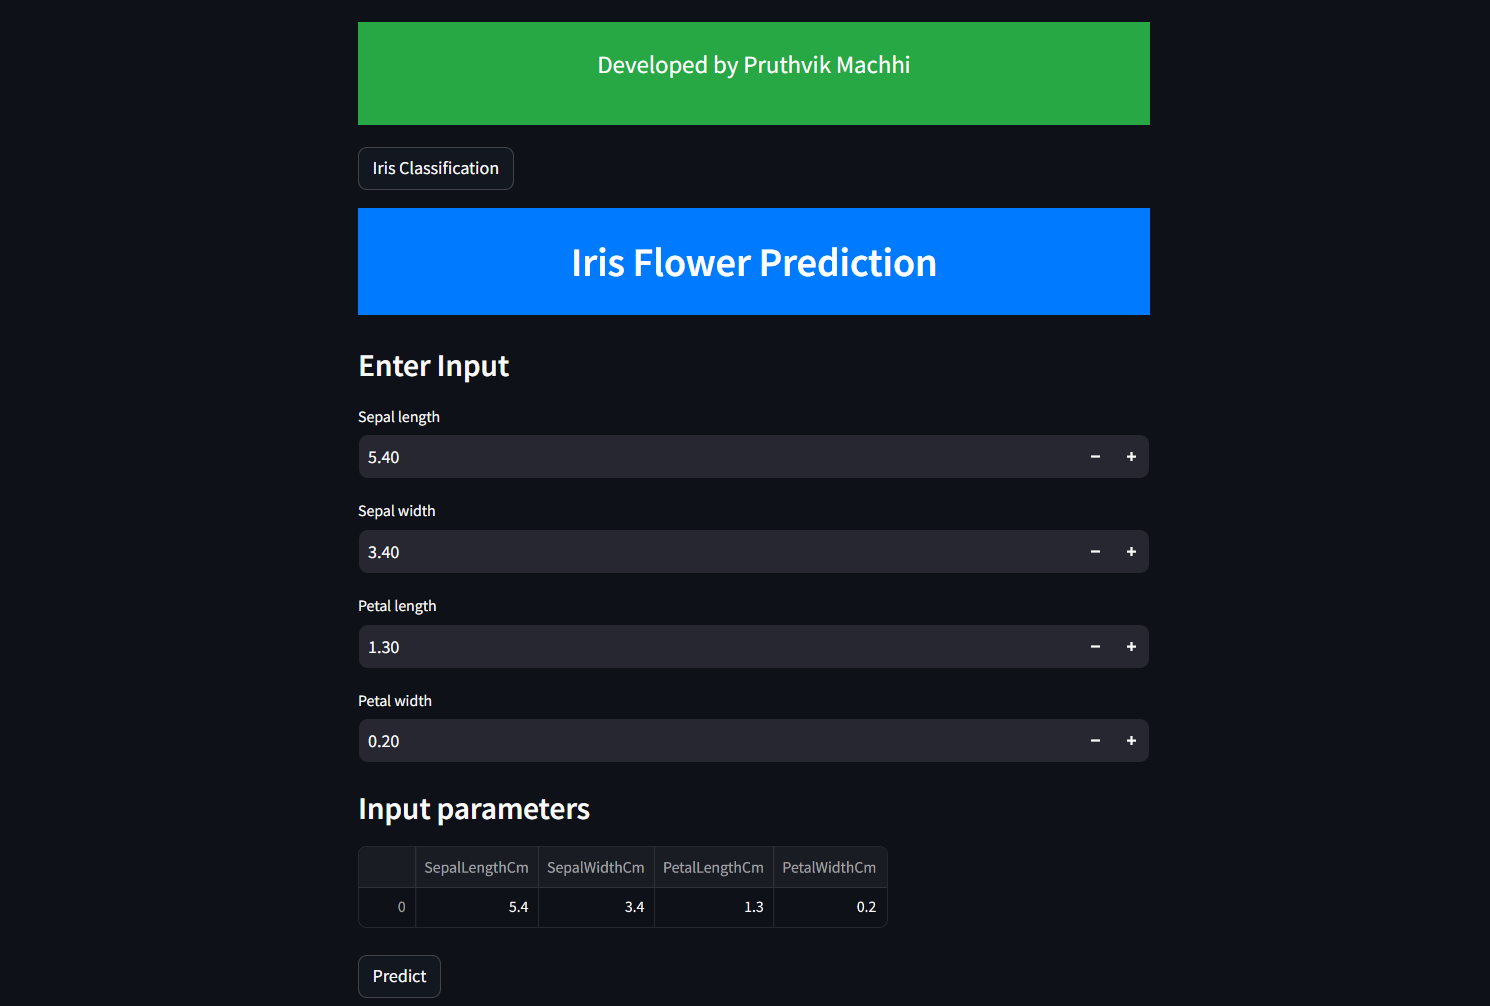

In [39]:
from IPython.display import Image
Image(filename='/kaggle/input/iris-flower-screenshot/Screenshot 2024-06-02 224940.png')


<div style="background-color: #66bbf1; padding: 28px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 30px;">Find all files on my github </h1>
</div>

Github: https://github.com/Pruthvik-Machhi/Iris-end-to-end-project

<div style="background-color: #66bbf1; padding: 28px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 30px;">Thanks for exploring my notebboks ! if you like it consider to give upvote </h1>
</div>